# Title of ML Project : Bike Sharing Rental Prediction

# Name : MOHAMMED ADIL K

# Organization : Entri Elevate

# Date : 13/07/2025

# Overview

##### This project focuses on developing machine learning models to predict bike rental demand using historical environmental, seasonal, and temporal data. The dataset includes hourly and daily records of bike rentals in Washington D.C., capturing weather conditions, date information, and user count details. The core objective is to forecast the number of bikes rented (cnt), while also exploring how external events (e.g., Hurricane Sandy) impact demand patterns, enabling anomaly or event detection.

##### The project implements multiple regression and classification algorithms, evaluates their performance using appropriate metrics, performs hyperparameter tuning, and saves the best model for deployment. The solution is designed to be production-ready using Docker and can be extended for future enhancements.

# Objective

##### The objective of this project is to predict bike rental demand based on environmental and seasonal factors while detecting anomalies caused by significant events.

# Data Description

 ##### Source : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

 ##### Features :
  ##### instant -	Record index (serial number; not needed for modeling)
  ##### dteday -	Date of the record (YYYY-MM-DD format)
  ##### season -	Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)
  ##### yr	- Year (0 = 2011, 1 = 2012)
  ##### mnth -	Month (1 to 12)
  ##### hr -	Hour of the day (0 to 23) (only in hourly dataset)
  ##### holiday -	Whether the day is a holiday (1 = Yes, 0 = No)
  ##### weekday -	Day of the week (0 = Sunday, 6 = Saturday)
  ##### workingday -	Whether the day is neither a weekend nor holiday (1 = Yes, 0 = No)
  ##### weathersit -	Weather situation:
  #####               1: Clear
  #####               2: Mist
  #####               3: Light Snow/Rain
  #####               4: Heavy Rain
  ##### temp -	Normalized temperature (0 to 1)
  ##### atemp - Normalized "feels like" temperature (0 to 1)
  ##### hum -	Normalized humidity (0 to 1)
  ##### windspeed -	Normalized wind speed (0 to 1)
  ##### casual -	Count of casual (unregistered) users (target leakage; drop for training)
  ##### registered -	Count of registered users (target leakage; drop for training)
  ##### cnt -	Total bike rentals (target variable for regression)

 ### Data Collection

In [31]:
import pandas as pd

hourly_df = pd.read_csv('hour.csv')
daily_df = pd.read_csv('day.csv')
print(hourly_df.shape);
print(daily_df.shape);

(17379, 17)
(731, 16)


In [32]:
print(hourly_df.head);
print(daily_df.head);

<bound method NDFrame.head of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0

### Data Preprocessing and Cleaning

In [33]:
print(hourly_df.info())
print(hourly_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

In [34]:
print(daily_df.info())
print(daily_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

In [35]:
# Drop unused columns
for df in [daily_df, hourly_df]:
    df.drop(['instant'], axis=1, inplace=True)
    df['dteday'] = pd.to_datetime(df['dteday'])

# Check duplicates
print("Day duplicates:", daily_df.duplicated().sum())
print("Hour duplicates:", hourly_df.duplicated().sum())

# Drop duplicates
daily_df.drop_duplicates(inplace=True)
hourly_df.drop_duplicates(inplace=True)

# Reset index
daily_df.reset_index(drop=True, inplace=True)
hourly_df.reset_index(drop=True, inplace=True)

Day duplicates: 0
Hour duplicates: 0


### Exploratory Data Analysis (EDA)

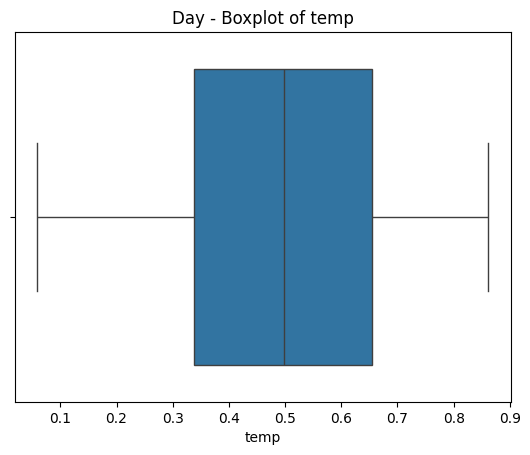

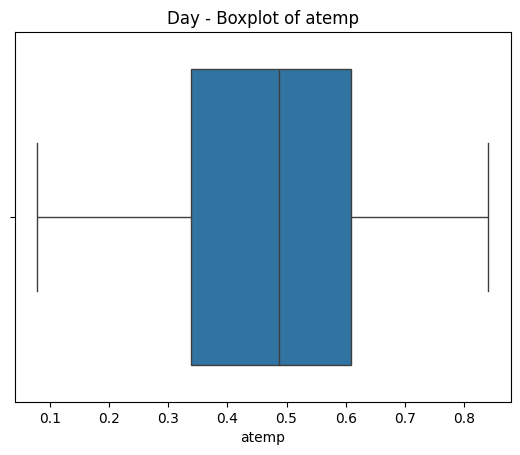

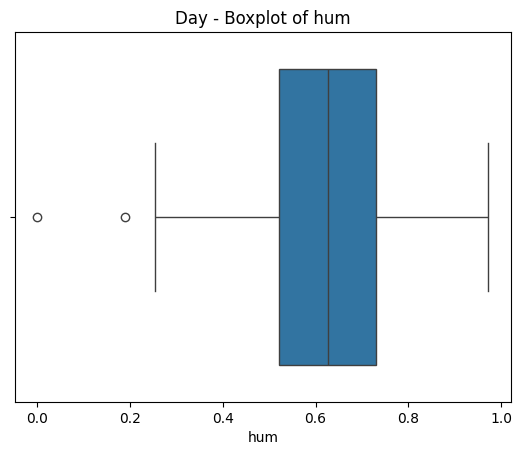

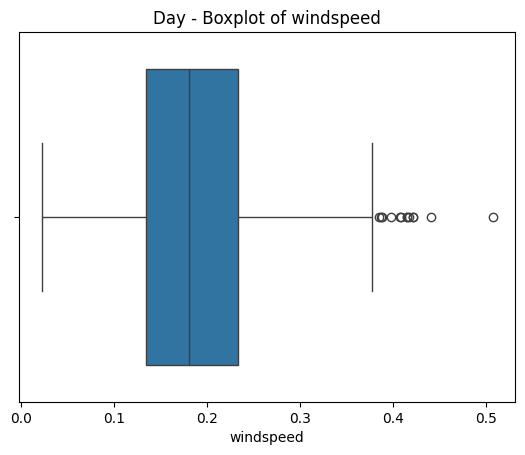

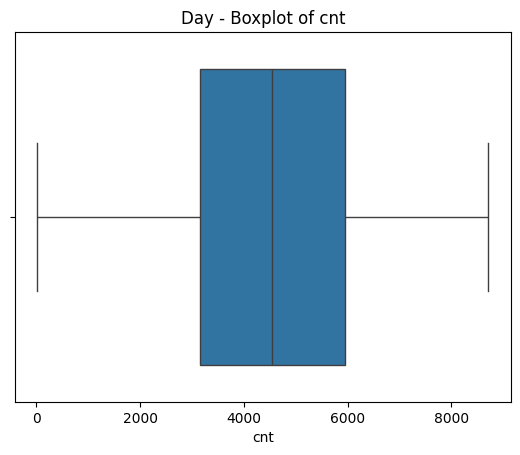

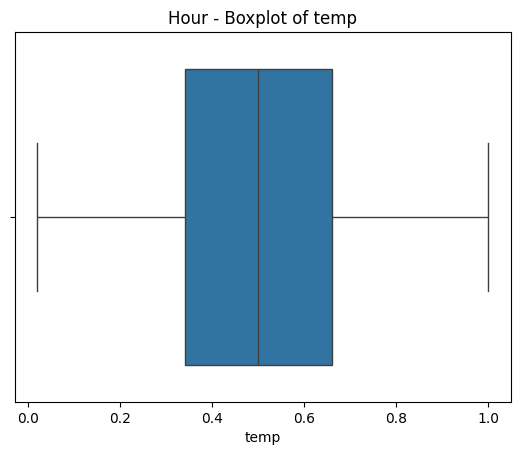

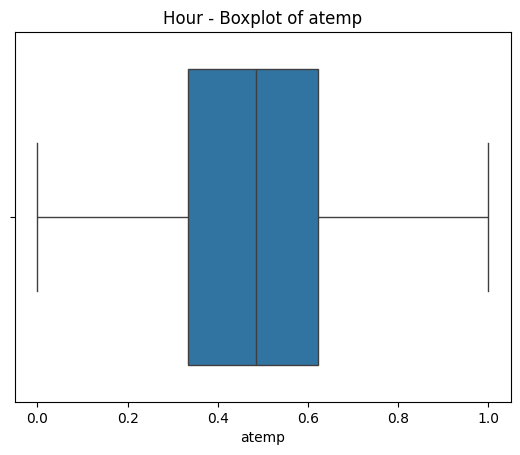

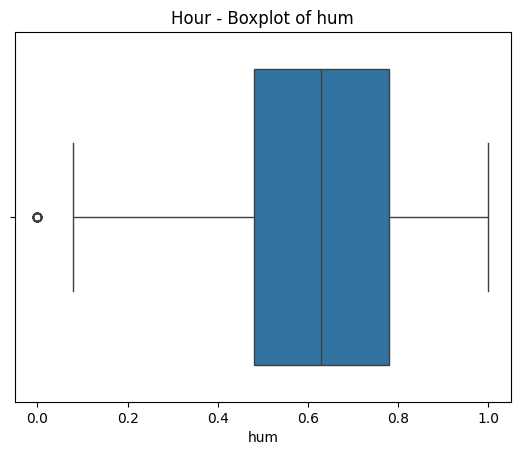

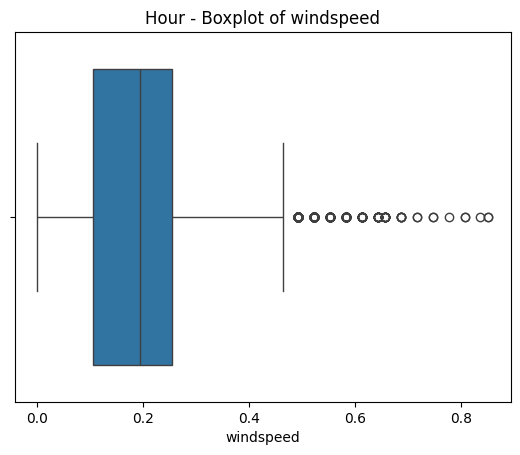

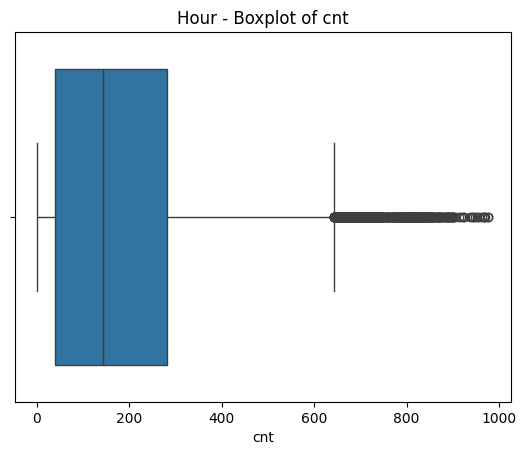

Day Skewness:
temp        -0.054521
atemp       -0.131088
hum         -0.069783
windspeed    0.677345
cnt         -0.047353
dtype: float64
Hour Skewness:
temp        -0.006021
atemp       -0.090429
hum         -0.111287
windspeed    0.574905
cnt          1.277412
dtype: float64


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric features
num_cols_day = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
num_cols_hour = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Boxplots for outliers
for col in num_cols_day:
    sns.boxplot(x=daily_df[col])
    plt.title(f'Day - Boxplot of {col}')
    plt.show()

for col in num_cols_hour:
    sns.boxplot(x=hourly_df[col])
    plt.title(f'Hour - Boxplot of {col}')
    plt.show()

# Skewness
print("Day Skewness:")
print(daily_df[num_cols_day].skew())

print("Hour Skewness:")
print(hourly_df[num_cols_hour].skew())

##### Outlier Removal (IQR Method)

In [37]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Apply on each dataset
for col in ['cnt', 'temp', 'atemp', 'hum', 'windspeed']:
    daily_df = remove_outliers_iqr(daily_df, col)
    hourly_df = remove_outliers_iqr(hourly_df, col)

# Reset index
daily_df.reset_index(drop=True, inplace=True)
hourly_df.reset_index(drop=True, inplace=True)

##### Skewness Correction

In [38]:
import numpy as np

daily_df['cnt_log'] = np.log1p(daily_df['cnt'])
hourly_df['cnt_log'] = np.log1p(hourly_df['cnt'])

### Feature Engineering

In [39]:
# Drop leakage columns
daily_df.drop(['casual', 'registered'], axis=1, inplace=True)
hourly_df.drop(['casual', 'registered'], axis=1, inplace=True)

# Add weekend flag
daily_df['is_weekend'] = daily_df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
hourly_df['is_weekend'] = hourly_df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

##### One-Hot Encoding

In [40]:
cat_cols = ['season', 'weathersit', 'mnth', 'weekday']

daily_df = pd.get_dummies(daily_df, columns=cat_cols, drop_first=True)
hourly_df = pd.get_dummies(hourly_df, columns=cat_cols + ['hr'], drop_first=True)

### Train-Test Split & Scaling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data(df, target='cnt_log'):
    X = df.drop(['cnt', 'cnt_log', 'dteday'], axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train_day, X_test_day, y_train_day, y_test_day = prepare_data(daily_df)
X_train_hr, X_test_hr, y_train_hr, y_test_hr = prepare_data(hourly_df)

### Model Training and Evaluation

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def train_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("Day Dataset Evaluation:")
train_evaluate(X_train_day, X_test_day, y_train_day, y_test_day)

print("Hour Dataset Evaluation:")
train_evaluate(X_train_hr, X_test_hr, y_train_hr, y_test_hr)

Day Dataset Evaluation:
R2 Score: 0.541754236283787
RMSE: 0.44457388074404613
Hour Dataset Evaluation:
R2 Score: 0.8197066266724501
RMSE: 0.5915797748443163


##### Train Regression Models

In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import joblib

In [44]:
reg_models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boost': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=500)
}

# Dictionary to store evaluation metrics
reg_results = {}

for name, model in reg_models.items():
    model.fit(X_train_day, y_train_day)
    y_pred = model.predict(X_test_day)
    reg_results[name] = {
        'MAE': mean_absolute_error(y_test_day, y_pred),
        'MSE': mean_squared_error(y_test_day, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_day, y_pred)),
        'R2': r2_score(y_test_day, y_pred)
    }

##### View Results

In [45]:
reg_results_df = pd.DataFrame(reg_results).T
reg_results_df.sort_values(by="R2", ascending=False)

,MAE,MSE,RMSE,R2
SVR,0.153967,0.174331,0.417530,0.595809
Gradient Boost,0.170594,0.194552,0.441081,0.548927
Linear Regression,0.194438,0.197646,0.444574,0.541754
Random Forest,0.171538,0.232774,0.482466,0.460310
AdaBoost,0.266558,0.248229,0.498226,0.424476
MLP Regressor,0.304868,0.327554,0.572324,0.240559


##### Evaluate

<Axes: title={'center': 'Regression Model Comparison'}>

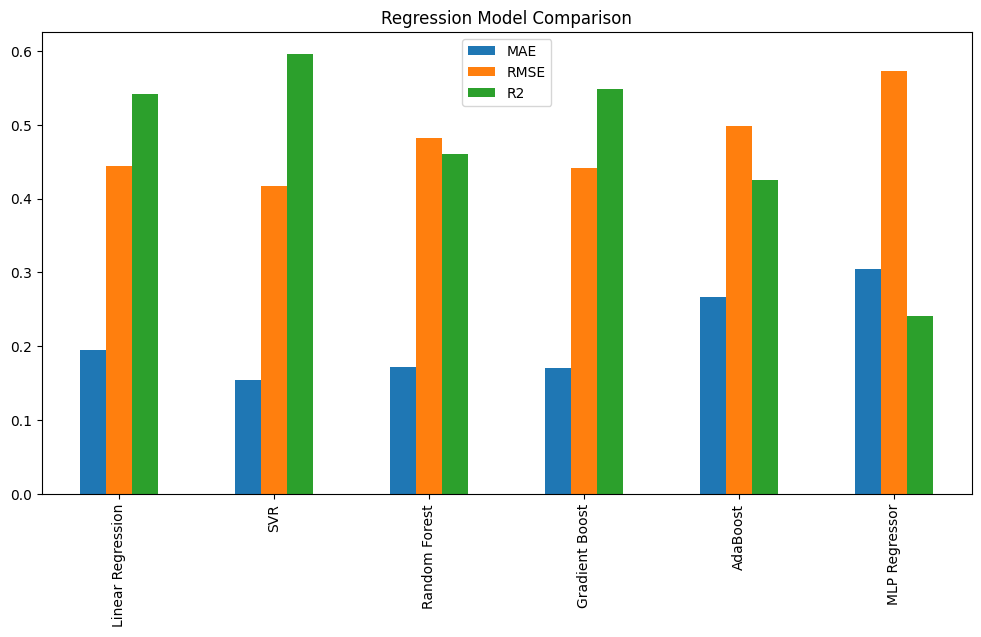

In [46]:
reg_results_df[['MAE', 'RMSE', 'R2']].plot(kind='bar', figsize=(12, 6), title="Regression Model Comparison")

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train_day, y_train_day)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.8176919253109999


### Save the Best Model

In [48]:
X = daily_df.drop(columns=['cnt', 'dteday'])
joblib.dump(grid.best_estimator_, 'bike_rental_model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

### Test on Unseen Data

In [49]:
unseen_preds = grid.predict(X_test_day)
print("Unseen R2 Score:", r2_score(y_test_day, unseen_preds))

Unseen R2 Score: 0.45832454553312185


### Interpretation of Results

In [50]:
reg_results_df.sort_values(by='R2', ascending=False).head()

,MAE,MSE,RMSE,R2
SVR,0.153967,0.174331,0.417530,0.595809
Gradient Boost,0.170594,0.194552,0.441081,0.548927
Linear Regression,0.194438,0.197646,0.444574,0.541754
Random Forest,0.171538,0.232774,0.482466,0.460310
AdaBoost,0.266558,0.248229,0.498226,0.424476


### Future Work

##### - Integrate Deep Learning (LSTM for time-series).
##### - Use external APIs (event/news) to enrich features.
##### - Apply anomaly detection for irregular rental spikes (e.g., hurricane days).
##### - Deploy with Docker and REST API using FastAPI.

### Save and Upload Model

##### Train or load best model

In [51]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Example: training your best model
best_model = RandomForestRegressor(n_estimators=200, max_depth=10)
best_model.fit(X_train_day, y_train_day)

RandomForestRegressor(max_depth=10, n_estimators=200)

##### Save the Model Using Joblib

In [52]:
import joblib

# Save model
joblib.dump(best_model, "bike_rental_model.pkl")

# Optional: save columns used during training
X = daily_df.drop(columns=['cnt', 'dteday'])
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']

##### Download the Model File

In [53]:
from google.colab import files

# Download the files
files.download("bike_rental_model.pkl")
files.download("model_columns.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>